<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
# IMPORT LABRARIES

# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

In [137]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [136]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [138]:
# ANSWER

cancer = cancer.drop(['Unnamed: 32'], axis=1)
X = cancer.drop(['id','diagnosis'], axis=1)
cancer['diagnosis_le'] = cancer['diagnosis'].map({'M':1, 'B':0})
y = cancer['diagnosis_le']

In [140]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [141]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_le, Length: 569, dtype: int64

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [87]:
cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [88]:
# ANSWER

corr = cancer.corr()

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [89]:
# ANSWER

eigenvalues, eigenvectors = np.linalg.eig(corr)

In [90]:
eigenvalues

array([1.32880574e+01, 5.69680537e+00, 2.83539505e+00, 1.98135718e+00,
       1.64881531e+00, 1.23467271e+00, 9.78273239e-01, 6.71752969e-01,
       4.60792428e-01, 4.03133096e-01, 3.49154976e-01, 2.93890434e-01,
       2.61146925e-01, 2.41330214e-01, 1.56973649e-01, 9.41285258e-02,
       7.98099486e-02, 5.90462723e-02, 5.25911946e-02, 4.91219277e-02,
       3.10707842e-02, 2.99412056e-02, 2.74305238e-02, 2.42490222e-02,
       1.80393609e-02, 1.54797297e-02, 8.17169884e-03, 6.89810286e-03,
       1.33040206e-04, 7.48376054e-04, 1.58933755e-03])

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [91]:
eigval_sum = sum(eigenvalues)
cum_var_exp = []
for i in eigenvalues:
    cum_var_exp.append((i/eigval_sum)*100)
           
cum_var_exp

[42.864701335977664,
 18.37679151062454,
 9.14643563906706,
 6.391474762638833,
 5.3187590486376815,
 3.9828151864915657,
 3.155720125988737,
 2.166945059863524,
 1.4864271859401261,
 1.3004293427842593,
 1.1263063739057255,
 0.9480336565112123,
 0.8424094348287932,
 0.7784845624482313,
 0.5063666103868492,
 0.3036404058251042,
 0.2574514469942796,
 0.19047184598312158,
 0.16964901475730673,
 0.1584578311604363,
 0.10022833622885591,
 0.09658453428849446,
 0.0884855606553542,
 0.07822265231410866,
 0.05819148668742843,
 0.049934611887064564,
 0.02636031883889034,
 0.022251944714192232,
 0.00042916195633572703,
 0.002414116304327281,
 0.005126895309868788]

In [92]:
def calculate_cum_var_exp(eig_vals):
    eigval_sum = sum(eigenvalues)
    cum_var_exp = []
    for i in eigenvalues:
        cum_var_exp.append((i/eigval_sum)*100)
    return cum_var_exp

In [93]:
calculate_cum_var_exp(eigenvalues)

[42.864701335977664,
 18.37679151062454,
 9.14643563906706,
 6.391474762638833,
 5.3187590486376815,
 3.9828151864915657,
 3.155720125988737,
 2.166945059863524,
 1.4864271859401261,
 1.3004293427842593,
 1.1263063739057255,
 0.9480336565112123,
 0.8424094348287932,
 0.7784845624482313,
 0.5063666103868492,
 0.3036404058251042,
 0.2574514469942796,
 0.19047184598312158,
 0.16964901475730673,
 0.1584578311604363,
 0.10022833622885591,
 0.09658453428849446,
 0.0884855606553542,
 0.07822265231410866,
 0.05819148668742843,
 0.049934611887064564,
 0.02636031883889034,
 0.022251944714192232,
 0.00042916195633572703,
 0.002414116304327281,
 0.005126895309868788]

In [94]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

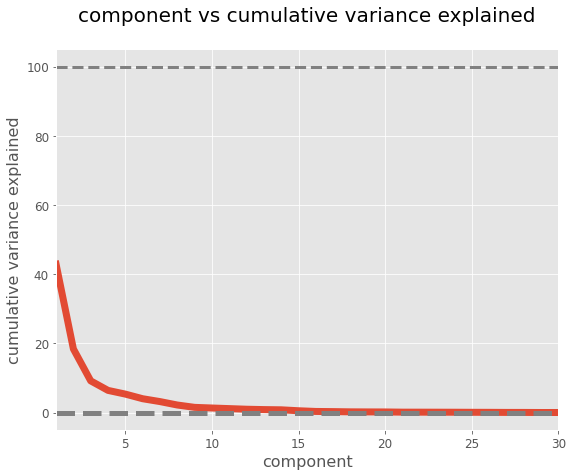

In [95]:
plot_var_exp(eigenvalues)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [148]:
# ANSWER
# Create an instance of PCA
from sklearn.decomposition import PCA

n_comp = 6
pca = PCA(n_comp)

# Fit Xs
pca.fit(X)


PCA(n_components=6)

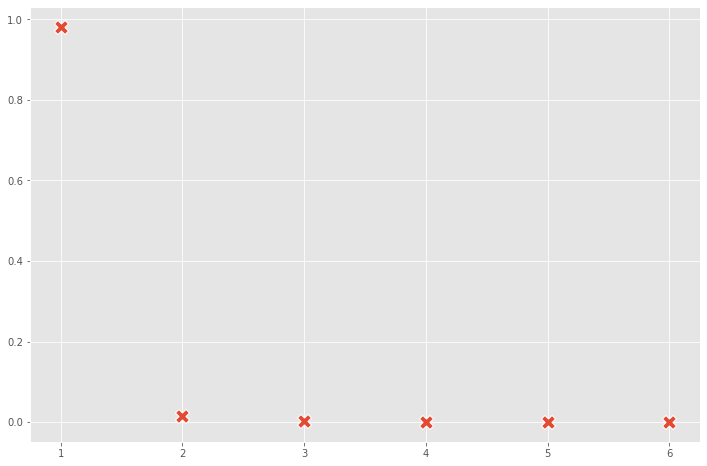

In [149]:
# ANSWER
# Plot explained_variance_

pca_exp_ratio = pca.explained_variance_ratio_
n = np.arange(1,n_comp+1)
sns.scatterplot(n,pca_exp_ratio, s=200, marker='X');

In [150]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

princ_components = pca.transform(X)

In [156]:
princ_components_df = pd.DataFrame(data=princ_components, columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6'])

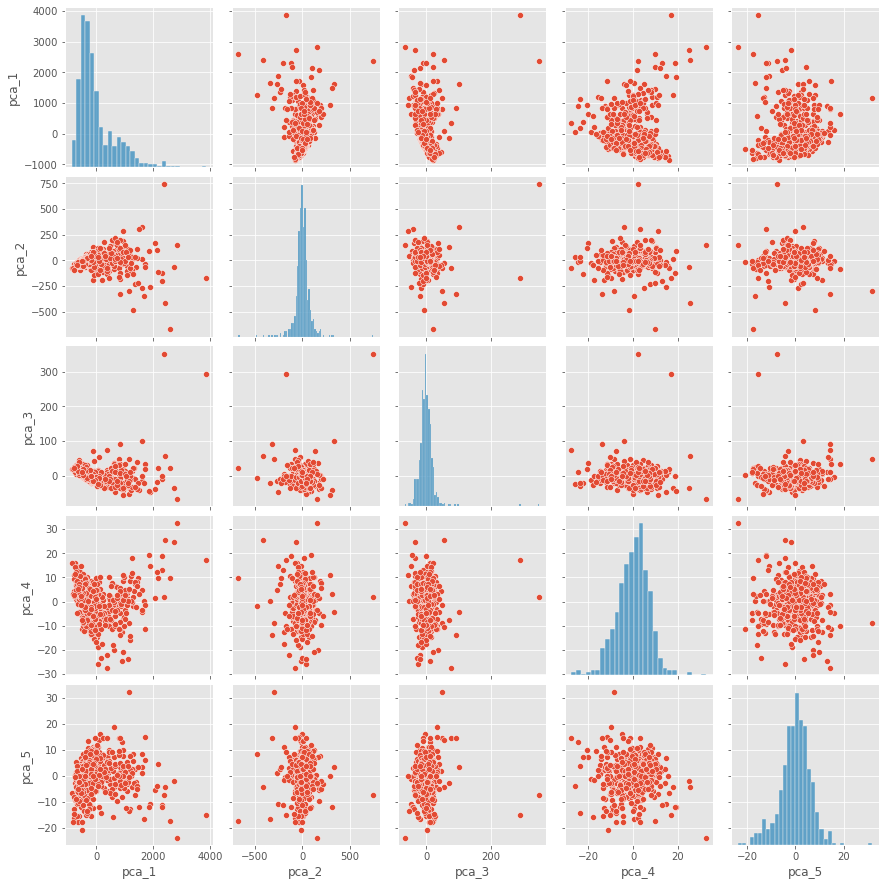

In [152]:
# ANSWER
# Create PairPlot of PCA

sns.pairplot(princ_components_df);

### 7. Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [153]:
# ANSWER
# Split Data

from sklearn.model_selection import train_test_split

In [162]:
X = princ_components_df
y = cancer['diagnosis_le']

In [163]:
X.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = np.mean(y_pred == y_test)
print(f"The accuarcy score of KNN is {acc:.2f}")

The accuarcy score of KNN is 0.92


In [0]:
# ANSWER

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



